### Τζώρτζης Ευάγγελος ΑΜ: 3088

## Ερώτηση 3

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn as sk
from sklearn.utils import shuffle

### Βήμα 1

In [3]:
jokes_df = pd.read_csv('jokes.csv')
jokes_df.set_index('joke_id',inplace=True)
jokes_df.index -= 1
jokes_df.head()

,joke_text
joke_id,
0,Q. What's O. J. Simpson's web address? A. Slas...
1,How many feminists does it take to screw in a ...
2,Q. Did you hear about the dyslexic devil worsh...
3,They asked the Japanese visitor if they have e...
4,Q: What did the blind person say when given so...


In [4]:
train_df = pd.read_csv('train.csv')
#train_df.set_index('id',inplace=True)
train_df.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [5]:
train_df['user_id'] -= 1
train_df['joke_id'] -= 1
train_df.head()

,id,user_id,joke_id,Rating
0,31030_110,31029,109,2.750
1,16144_109,16143,108,5.094
2,23098_6,23097,5,-6.438
3,14273_86,14272,85,4.406
4,18419_134,18418,133,9.375


In [6]:
sh_df = shuffle(train_df,random_state=2021)

In [7]:
sh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092059 entries, 948837 to 91252
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   id       1092059 non-null  object 
 1   user_id  1092059 non-null  int64  
 2   joke_id  1092059 non-null  int64  
 3   Rating   1092059 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 41.7+ MB


In [8]:
testdata = sh_df.head(10000)
testdata

,id,user_id,joke_id,Rating
948837,39893_22,39892,21,-0.281
502194,25778_7,25777,6,-7.031
727692,24147_76,24146,75,5.750
155191,4374_9,4373,8,-4.125
897456,18377_120,18376,119,-2.500
...,...,...,...,...
588150,24968_123,24967,122,4.312
376437,27371_3,27370,2,-4.188
393810,23050_50,23049,49,-0.969
97076,247_9,246,8,6.312


In [9]:
traindata = pd.concat([sh_df,testdata]).drop_duplicates(keep=False)
traindata

,id,user_id,joke_id,Rating
478625,36393_109,36392,108,-1.438
1026352,16154_7,16153,6,-4.750
714547,38887_112,38886,111,2.250
940880,11008_14,11007,13,-3.969
674926,13037_107,13036,106,3.688
...,...,...,...,...
742911,20386_5,20385,4,4.281
743382,17244_138,17243,137,5.906
675678,37362_32,37361,31,0.062
224597,2760_86,2759,85,7.156


In [10]:
testdata.reset_index(inplace=True)
traindata.reset_index(inplace=True)

testdata.head()

,index,id,user_id,joke_id,Rating
0,948837,39893_22,39892,21,-0.281
1,502194,25778_7,25777,6,-7.031
2,727692,24147_76,24146,75,5.750
3,155191,4374_9,4373,8,-4.125
4,897456,18377_120,18376,119,-2.500


In [11]:
traindata.head()

,index,id,user_id,joke_id,Rating
0,478625,36393_109,36392,108,-1.438
1,1026352,16154_7,16153,6,-4.750
2,714547,38887_112,38886,111,2.250
3,940880,11008_14,11007,13,-3.969
4,674926,13037_107,13036,106,3.688


In [12]:
testdata.loc[testdata['Rating'] == 0.0,'Rating'] = 10**-15
testdata.head()

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,id,user_id,joke_id,Rating
0,948837,39893_22,39892,21,-0.281
1,502194,25778_7,25777,6,-7.031
2,727692,24147_76,24146,75,5.750
3,155191,4374_9,4373,8,-4.125
4,897456,18377_120,18376,119,-2.500


In [13]:
traindata.loc[traindata['Rating'] == 0.0 , 'Rating'] = 10**-15
traindata.head()

,index,id,user_id,joke_id,Rating
0,478625,36393_109,36392,108,-1.438
1,1026352,16154_7,16153,6,-4.750
2,714547,38887_112,38886,111,2.250
3,940880,11008_14,11007,13,-3.969
4,674926,13037_107,13036,106,3.688


### Βήμα 2

In [14]:
# User Average

In [15]:
user_average = traindata.groupby('user_id')['Rating'].mean()
user_average = user_average.to_frame()
user_average.reset_index(inplace=True)
user_average.head()

,user_id,Rating
0,0,2.502220
1,1,4.456565
2,2,-5.544167
3,3,2.993000
4,4,-1.723889


In [16]:
merged_testdata = pd.merge(testdata,user_average, on=['user_id'])
merged_testdata.head()

,index,id,user_id,joke_id,Rating_x,Rating_y
0,948837,39893_22,39892,21,-0.281,1.522214
1,502194,25778_7,25777,6,-7.031,-1.124298
2,727692,24147_76,24146,75,5.750,3.214860
3,367563,24147_89,24146,88,4.156,3.214860
4,299082,24147_100,24146,99,4.031,3.214860


In [17]:
rmse1 =(merged_testdata['Rating_x'] - merged_testdata['Rating_y'])**2

rmse1 = np.sqrt((1/10000)*(rmse1.sum()))
rmse1

4.52416766013762

In [18]:
# Joke Average

In [19]:
joke_average = traindata.groupby('joke_id')['Rating'].mean()
joke_average = joke_average.to_frame()
joke_average.reset_index(inplace=True)
joke_average.head()

,joke_id,Rating
0,0,-2.243212
1,1,-1.933326
2,2,-0.669190
3,3,-0.606896
4,4,-1.414191


In [20]:
merged_testdata2 = pd.merge(testdata,joke_average, on=['joke_id'])
merged_testdata2.head()

,index,id,user_id,joke_id,Rating_x,Rating_y
0,948837,39893_22,39892,21,-0.281,3.505219
1,190003,23075_22,23074,21,3.156,3.505219
2,1031510,23172_22,23171,21,2.906,3.505219
3,207822,7283_22,7282,21,-2.938,3.505219
4,208851,33971_22,33970,21,2.656,3.505219


In [21]:
rmse2 =(merged_testdata2['Rating_x'] - merged_testdata2['Rating_y'])**2

rmse2 = np.sqrt((1/10000)*(rmse2.sum()))
rmse2

5.049905611823062

In [22]:
print('User Average RMSE: ',rmse1)
print('Joke Average RMSE: ',rmse2)

User Average RMSE:  4.52416766013762
Joke Average RMSE:  5.049905611823062


Οι δύο τιμές των RMSE είναι κοντά μεταξύ τους, κάτι που σημαίνει ότι θα μπορούσαν να χρησιμοποιηθούν εναλλακτικά για την πρόβλεψη βαθμολογιών.

### Βήμα 3

In [23]:
# User-Based collaborative Filtering (UCF)

In [330]:
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist
from sklearn.neighbors import NearestNeighbors
from scipy.spatial  import KDTree
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

import time

In [25]:
traindata.head()

,index,id,user_id,joke_id,Rating
0,478625,36393_109,36392,108,-1.438
1,1026352,16154_7,16153,6,-4.750
2,714547,38887_112,38886,111,2.250
3,940880,11008_14,11007,13,-3.969
4,674926,13037_107,13036,106,3.688


In [26]:
testdata.head()

,index,id,user_id,joke_id,Rating
0,948837,39893_22,39892,21,-0.281
1,502194,25778_7,25777,6,-7.031
2,727692,24147_76,24146,75,5.750
3,155191,4374_9,4373,8,-4.125
4,897456,18377_120,18376,119,-2.500


In [27]:
row = traindata.iloc[:]['user_id']
col = traindata.iloc[:]['joke_id']
data = traindata.iloc[:]['Rating']

# a matrix R with R[row[i],col[i]] = data[i] will be created 
R = sp_sparse.csr_matrix((data,(row,col)))

# first value is the user id (od a range of users) , second value is the range of jokes for this user
#print(R[32782,:])  

# transforms back to full matrix
print(R.toarray().shape)

(40863, 139)


In [28]:
k = 10 # 10,25,50,75,100 number of closest users by cosine distance

In [29]:
# alternative to nearest neighbor
similarities_sparse = cosine_similarity(R, dense_output=False)

In [30]:
print(similarities_sparse.shape)

(40863, 40863)


In [353]:
index_list = np.where(R.toarray()[:,0] != 0)[0] # list with all the users that have rated joke=0

In [32]:
R.toarray()[index_list,:] .shape

(382, 139)

In [33]:
sorted_i = np.argsort(similarities_sparse[0,index_list].toarray())

In [34]:
if index_list.size > k+1:
    ink_list = index_list[sorted_i[0][-(k+1):]] # best k(+1 because user is included with similarity 1) indices
else:
    ink_list = index_list[sorted_i[0][:]]
ink_list_n = ink_list[:-1]
ink_list_n

array([506, 267, 340, 152, 318,  79, 536, 499, 381, 242], dtype=int64)

In [35]:
R.toarray()[ink_list_n,0]

array([ 4.375,  2.375, -3.344,  5.125, -9.156, -9.719,  0.75 , -8.844,
       -6.344,  4.438])

In [36]:
similarities_sparse[0,ink_list_n].toarray()

array([[0.37739175, 0.37947571, 0.38282457, 0.38293588, 0.38994937,
        0.39287381, 0.42046471, 0.42723235, 0.45039445, 0.52465798]])

In [38]:
p = ((R.toarray()[ink_list_n,0] * similarities_sparse[0,ink_list_n].toarray()).sum()) / similarities_sparse[0,ink_list_n].toarray().sum() # p for user = 0 , joke = 0
p

-1.9732463899802593

In [39]:
def ubcf(r,c):
    index_list = np.where(R.toarray()[:,c] != 0)[0]
    sorted_i = np.argsort(similarities_sparse[r,index_list].toarray())
    if index_list.size > k+1:
        ink_list = index_list[sorted_i[0][-(k+1):]] # best k(+1 because user is included with similarity 1) indices
    else:
        ink_list = index_list[sorted_i[0][:]]
    ink_list_n = ink_list[:-1]
    
    
    p = ((R.toarray()[ink_list_n,c] * similarities_sparse[r,ink_list_n].toarray()).sum()) / similarities_sparse[r,ink_list_n].toarray().sum()
    return(p)

In [40]:
print(ubcf(0,1))

-6.247069590113146


In [325]:
testdata.head()

,index,id,user_id,joke_id,Rating,predicted_k2,predicted_k3,predicted_k4,predicted_k5,predicted_k6,...,predicted_k11,predicted_k12,predicted_k13,predicted_k14,predicted_k15,predicted_k16,predicted_k17,predicted_k18,predicted_k19,predicted_k20
0,948837,39893_22,39892,21,-0.281,0.576068,0.576068,0.905420,0.904283,0.949295,...,0.858095,1.111962,1.395229,1.455563,1.438508,1.671203,2.089527,1.857076,1.884208,1.310657
1,502194,25778_7,25777,6,-7.031,-2.696052,-2.696052,-4.132730,-2.488285,-2.798875,...,-0.226821,-0.346196,-0.372340,-0.421047,-0.176808,-0.312606,-0.429485,-0.501017,-0.499463,-0.436023
2,727692,24147_76,24146,75,5.750,0.862005,0.862005,0.870851,0.958490,0.961148,...,0.936387,0.890929,0.808295,0.826624,0.969157,0.962792,0.968208,0.884359,0.986389,0.987317
3,155191,4374_9,4373,8,-4.125,2.393193,2.393193,0.076425,-0.778617,-0.325651,...,-1.338863,-0.719061,0.232070,0.000368,0.207991,0.139147,0.133379,0.050675,0.013439,-0.005607
4,897456,18377_120,18376,119,-2.500,0.344290,0.344290,0.318921,0.282692,0.314829,...,-0.071873,0.005156,-0.309307,-0.220968,-0.206857,-0.070626,-0.174274,-0.134596,-0.367548,-0.344399


In [328]:
start_time = time.time()
predicted_results = testdata[['user_id','joke_id']].apply(lambda x: ubcf(x.user_id, x.joke_id), axis=1)
end_time = time.time()
print('Time taken: %f seconds ' %(end_time-start_time))

Time taken: 558.126562 seconds 


In [331]:
mean_squared_error(y_true=testdata.Rating,y_pred=predicted_results,squared=False)

5.678221567920717

In [335]:
ubcf_rmse_results = []
klist = [10,25,50,75,100]
for i in klist:
    k = i
    start_time = time.time()
    predicted_results = testdata[['user_id','joke_id']].apply(lambda x: ubcf(x.user_id, x.joke_id), axis=1)
    end_time = time.time()
    print('Time taken: %f seconds for k=%d' %(end_time-start_time,k))
    
    ubcf_rmse = mean_squared_error(y_true=testdata.Rating,y_pred=predicted_results,squared=False)
    ubcf_rmse_results.append(ubcf_rmse)
    
print('Results: ',ubcf_rmse_results)

Time taken: 416.886027 seconds for k=10
Time taken: 355.420520 seconds for k=25
Time taken: 359.016030 seconds for k=50
Time taken: 378.449515 seconds for k=75
Time taken: 383.542956 seconds for k=100
Results:  [4.505006835887949, 4.421608657646379, 4.4130703499550235, 4.404614360538365, 4.400143582685792]


Text(0.5, 0, 'k')

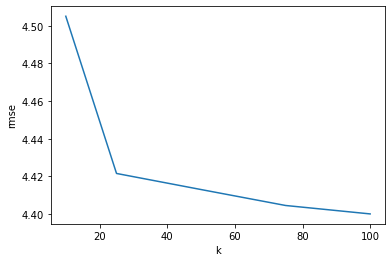

In [340]:
plt.plot(klist,ubcf_rmse_results)
plt.ylabel('rmse')
plt.xlabel('k')

Το καλύτερο αποτέλεσμα RMSE = 4.400143582685792 είναι για k = 100 πιο όμοιους χρήστες, ωστόσο η διαφορά με τα υπόλοιπα k είναι πολύ μικρή.

### Βήμα 4

In [341]:
# Item-Based collaborative Filtering (ICF)

In [346]:
row1 = traindata.iloc[:]['joke_id']
col1 = traindata.iloc[:]['user_id']
data1 = traindata.iloc[:]['Rating']

# a matrix R with R[row[i],col[i]] = data[i] will be created 
R1 = sp_sparse.csr_matrix((data1,(row1,col1)))

# first value is the joke id (or a range of jokes) , second value is the range of user for this joke
#print(R1[138,:])  

# transforms back to full matrix
print(R1.toarray().shape)

(139, 40863)


In [690]:
k = 5 # 1,2,5,7,10 number of closest jokes by cosine distance

In [691]:
similarities_sparse1 = cosine_similarity(R1, dense_output=False)
print(similarities_sparse1.shape)

(139, 139)


In [692]:
index_list1 = np.where(R1.toarray()[:,0] != 0.0)[0] # list with all the jokes that have been rated by user=0
index_list1

array([  0,   1,   3,   4,   5,   6,   7,   8,  11,  16,  18,  20,  23,
        24,  31,  38,  41,  42,  43,  50,  51,  55,  58,  61,  65,  69,
        78,  80,  81,  82,  91,  92,  94,  96,  97,  98, 107, 108, 109,
       116, 117], dtype=int64)

In [693]:
R1.toarray()[index_list1,0]

array([ 2.190e-01, -9.281e+00, -6.781e+00,  8.750e-01, -9.656e+00,
       -9.031e+00, -7.469e+00, -8.719e+00, -8.781e+00,  8.781e+00,
        8.781e+00,  8.781e+00, -2.500e-01,  8.781e+00,  6.200e-02,
        6.200e-02,  6.200e-02,  8.781e+00,  8.688e+00,  3.100e-02,
        2.190e-01,  8.688e+00,  8.688e+00,  8.781e+00,  9.312e+00,
        6.200e-02,  9.812e+00,  8.781e+00,  3.625e+00,  9.312e+00,
        7.500e-01, -5.000e+00,  2.000e+00,  2.031e+00,  5.688e+00,
        9.656e+00,  1.000e-15,  8.781e+00,  8.781e+00,  8.688e+00,
        1.000e-15])

In [616]:
sorted_i1 = np.argsort(similarities_sparse1[0,index_list1].toarray(),kind='stable')
sorted_i1[0]

array([23, 21, 20, 37, 39, 10, 28, 40, 26, 27, 13, 34,  7, 17, 36, 29, 15,
       24, 38,  9,  8, 14, 18, 35, 25, 22, 32,  5, 33,  6, 12, 30, 16,  4,
       31, 19,  3,  2,  1, 11,  0], dtype=int64)

In [623]:
if index_list1.size > k+1:
    ink_list1 = index_list1[sorted_i1[0][-(k+1):]] # best k(+1 because joke is included with similarity 1) indices
else:
    ink_lis1t = index_list1[sorted_i1[0][:]]
ink_list_n1 = ink_list1[:-1]
ink_list_n1

array([50,  4,  3,  1, 20], dtype=int64)

In [624]:
R.toarray()[ink_list_n1,0]

array([ 0.   , -0.031,  6.906, -9.688,  0.   ])

In [625]:
similarities_sparse1[0,ink_list_n1].toarray()

array([[0.01858824, 0.02783322, 0.03222976, 0.03296558, 0.0464729 ]])

In [626]:
p1 = ((R1.toarray()[ink_list_n1,0] * similarities_sparse1[0,ink_list_n1].toarray()).sum()) / similarities_sparse1[0,ink_list_n1].toarray().sum() # p for joke = 0 , user = 0
p1

-0.5787516085672461

In [627]:
def icf(r,c):
    index_list1 = np.where(R1.toarray()[:,c] != 0)[0]
    sorted_i1 = np.argsort(similarities_sparse1[r,index_list1].toarray())
    if index_list1.size > k+1:
        ink_list1 = index_list1[sorted_i1[0][-(k+1):]] # best k(+1 because joke is included with similarity 1) indices
    else:
        ink_list1 = index_list1[sorted_i1[0][:]]
    ink_list_n1 = ink_list1[:-1]
    
    
    p = ((R1.toarray()[ink_list_n1,c] * similarities_sparse1[r,ink_list_n1].toarray()).sum()) / similarities_sparse1[r,ink_list_n1].toarray().sum()
    return(p)

In [628]:
print(icf(0,1))

-3.0045033336513853


In [403]:
k = 7
start_time = time.time()
predicted_results = testdata[['user_id','joke_id']].apply(lambda x: icf(x.joke_id, x.user_id), axis=1)
end_time = time.time()
print('Time taken: %f seconds ' %(end_time-start_time))

Time taken: 346.240997 seconds 


In [404]:
mean_squared_error(y_true=testdata.Rating,y_pred=predicted_results,squared=False)

13.095156745175494

In [401]:
icf_rmse_results = []
klist = [1,2,5,7,10]
for i in klist:
    k = i
    start_time = time.time()
    predicted_results = testdata[['user_id','joke_id']].apply(lambda x: icf(x.joke_id, x.user_id), axis=1)
    end_time = time.time()
    print('Time taken: %f seconds for k=%d' %(end_time-start_time,k))
    
    icf_rmse = mean_squared_error(y_true=testdata.Rating,y_pred=predicted_results,squared=False)
    icf_rmse_results.append(icf_rmse)
    
print('Results: ',icf_rmse_results)

Time taken: 349.724787 seconds for k=1
Time taken: 384.347673 seconds for k=2
Time taken: 351.298664 seconds for k=5
Time taken: 393.222422 seconds for k=7
Time taken: 392.805556 seconds for k=10
Results:  [5.4190255797514, 4.707589212323444, 4.41912343122678, 13.095156745175494, 7.795283681364708]


Text(0.5, 0, 'k')

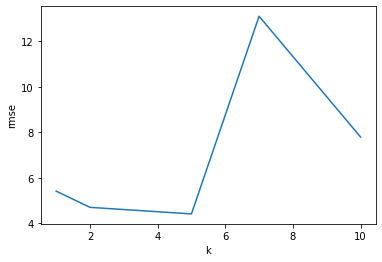

In [402]:
plt.plot(klist,icf_rmse_results)
plt.ylabel('rmse')
plt.xlabel('k')

Το καλύτερο αποτέλεσμα RMSE = 4.41912343122678 είναι για k = 5 πιο όμοιους αστεία.

### Βήμα 5

In [123]:
from numpy.linalg import svd
import scipy.sparse.linalg as sp_linalg
from sklearn.metrics import mean_squared_error

In [125]:
# low rank approximation

(40863, 20) (20,) (20, 139)
[ 560.79488461  566.07021283  583.22312471  588.38289369  596.18164849
  619.66670067  635.6347452   657.11518826  668.40708494  722.44737933
  738.30996039  751.23053009  774.90996988  787.02226257  814.09366187
  839.55585044  928.20259008 1023.13992684 1330.32347276 2408.83140829]


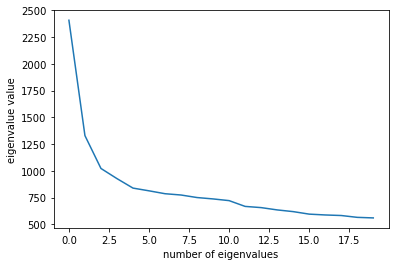

In [282]:
K = 20 # K= 2 to 20

data2 = R.toarray().copy()

U_k,s_k,V_k = sp_linalg.svds(data2, K, which = 'LM')
print (U_k.shape, s_k.shape, V_k.shape)
print(s_k)
plt.plot(s_k[::-1])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')
S_k = np.diag(s_k)

5739.987799671699
5210.085525863222
5037.383313252462
4932.384345805005
4844.260034981204
4770.95391515217
4700.984234200568
4634.635770846977
4569.394190370951
4507.218206128881
4446.33718469991
4387.252459585617
4336.0369132358355
4285.955639328923
4238.55921428317
4193.017695296262
4150.417429015079
4108.499775524478
4066.8933096758515
4027.305017804589
3988.0690570537913


Text(0.5, 0, 'rank')

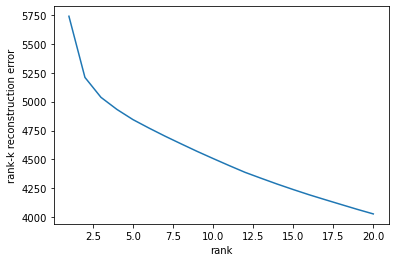

In [283]:
reconstruction_error = []
for k in range(K,0,-1):
    data_k = U_k[:,k:].dot(S_k[k:,k:]).dot(V_k[k:,:])
    error = np.linalg.norm(data_k-data2,ord='fro')
    reconstruction_error.append(error)
    print(error)
data_k = U_k.dot(S_k).dot(V_k)
print(np.linalg.norm(data_k-data2,ord='fro'))

plt.plot(1+np.array(range(K)),reconstruction_error)
plt.ylabel('rank-k reconstruction error')
plt.xlabel('rank')

In [284]:
# compare test values to data_k approximation values with rmse

In [285]:
testdata['predicted_k'+str(K)] = data_k[testdata['user_id'],testdata['joke_id']]

In [286]:
testdata

,index,id,user_id,joke_id,Rating,predicted_k2,predicted_k3,predicted_k4,predicted_k5,predicted_k6,...,predicted_k11,predicted_k12,predicted_k13,predicted_k14,predicted_k15,predicted_k16,predicted_k17,predicted_k18,predicted_k19,predicted_k20
0,948837,39893_22,39892,21,-0.281,0.576068,0.576068,0.905420,0.904283,0.949295,...,0.858095,1.111962,1.395229,1.455563,1.438508,1.671203,2.089527,1.857076,1.884208,1.310657
1,502194,25778_7,25777,6,-7.031,-2.696052,-2.696052,-4.132730,-2.488285,-2.798875,...,-0.226821,-0.346196,-0.372340,-0.421047,-0.176808,-0.312606,-0.429485,-0.501017,-0.499463,-0.436023
2,727692,24147_76,24146,75,5.750,0.862005,0.862005,0.870851,0.958490,0.961148,...,0.936387,0.890929,0.808295,0.826624,0.969157,0.962792,0.968208,0.884359,0.986389,0.987317
3,155191,4374_9,4373,8,-4.125,2.393193,2.393193,0.076425,-0.778617,-0.325651,...,-1.338863,-0.719061,0.232070,0.000368,0.207991,0.139147,0.133379,0.050675,0.013439,-0.005607
4,897456,18377_120,18376,119,-2.500,0.344290,0.344290,0.318921,0.282692,0.314829,...,-0.071873,0.005156,-0.309307,-0.220968,-0.206857,-0.070626,-0.174274,-0.134596,-0.367548,-0.344399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,588150,24968_123,24967,122,4.312,1.984136,1.984136,1.933578,1.994059,1.993248,...,2.082176,2.120875,2.081653,1.912500,1.927814,2.155712,2.154310,2.373785,2.415524,2.399607
9996,376437,27371_3,27370,2,-4.188,-2.968283,-2.968283,-2.911530,-3.315585,-3.769102,...,-0.031354,-0.169271,-0.172530,-0.101459,-0.107072,-0.091164,-0.059685,-0.099406,0.032200,0.028100
9997,393810,23050_50,23049,49,-0.969,0.381786,0.381786,0.381033,0.379264,0.402150,...,0.513752,0.427457,0.352551,0.428284,0.840630,0.866463,0.838188,0.781463,0.648804,0.634088
9998,97076,247_9,246,8,6.312,-1.445686,-1.445686,0.836662,1.160646,2.144949,...,-0.427741,0.100175,-0.077624,0.111766,0.287287,0.130787,-0.000615,0.023555,0.040316,0.043244


In [289]:
rmse_l = []
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k2,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k3,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k4,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k5,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k6,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k7,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k8,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k9,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k10,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k11,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k12,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k13,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k14,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k15,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k16,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k17,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k18,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k19,squared=False))
rmse_l.append(mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k20,squared=False))

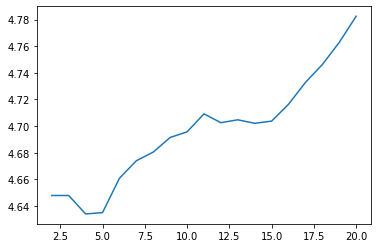

In [295]:
plt.plot(2 + np.array(range(K-1)),rmse_l)

In [629]:
best_rmse = mean_squared_error(y_true=testdata.Rating,y_pred=testdata.predicted_k4,squared=False)
print('Best RMSE for k=4: ',best_rmse)

Best RMSE for k=4:  4.634031834770969


Φαίνεται ότι όσο μεγαλώνει το rank k , εισάγεται θόρυβος και αυξάνεται το συνολικό σφάλμα. Για k = 4 υπάρχει το ελάχιστο σφάλμα

### Βήμα 6

|Algorithm            |RMSE                 | Time(s)     |
|:-:                  |:-:                  | :-:         |
| User Average        | 4.52416766013762    | ~0          |
| Joke Average        | 5.049905611823062   | ~0          |
| User Based Coll. F. | 4.400143582685792   | 383.542956  |
| Joke Based Coll. F. | 4.41912343122678    | 351.298664  |
| SVD                 | 4.634031834770969   | ~0          |


Τα RMSE των διαφορετικών αλγορίθμων είναι αρκέτα κοντά μεταξύ τους, με το Joke Average να έχει λίγο μεγαλύτερο RMSE. Επίσης οι περισσότεροι αλγόριθμοι είναι αρκετά γρήγοροι με τα UCF, ICF να είναι τα μόνα που παίρνουν περισσότερο χρόνο.

## Ερώτηση 4

In [728]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [639]:
R.toarray()

array([[ 0.219, -9.281,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-9.688,  9.938,  9.531, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -7.219, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , -4.594, -4.312, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , -4.438,  1.531, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , -7.906,  0.   , ...,  8.281,  0.   ,  0.   ]])

In [739]:
kmeans = KMeans(n_clusters=10)
kmeans.fit_predict(R.toarray())

centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  25533057.825194586

Cluster labels
[3 5 4 ... 1 1 9]

 Cluster Centroids
[[-0.03272203 -2.53533916 -2.51808392 ... -2.46091783 -2.13622028
  -2.43367657]
 [-0.01258065 -0.69984516 -0.34330544 ... -0.0487329   0.23615171
   0.07979226]
 [-0.01476749 -0.36351884  0.5291873  ...  0.43365318  1.85057137
   0.80607793]
 ...
 [ 0.02001195 -0.15385783  1.55612903 ...  4.37022461  4.6753859
   4.65117443]
 [-0.03128219 -5.18786411 -1.73160552 ...  0.11467494  0.34584242
   0.19359406]
 [-0.00806647 -1.03573117  0.40322489 ...  2.42293796  3.66983604
   2.68872009]]


In [746]:
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(2,11):
    start_time = time.time()
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(R.toarray())
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(R.toarray(), kmeans.labels_)
    end_time = time.time()
    print('Time for k=%d : %f seconds'%(k,end_time-start_time))

Time for k=2 : 28.194114 seconds
Time for k=3 : 33.602919 seconds
Time for k=4 : 30.962008 seconds
Time for k=5 : 30.887670 seconds
Time for k=6 : 30.566803 seconds
Time for k=7 : 30.093318 seconds
Time for k=8 : 30.813646 seconds
Time for k=9 : 32.348768 seconds
Time for k=10 : 32.033838 seconds


Text(0, 0.5, 'Error')

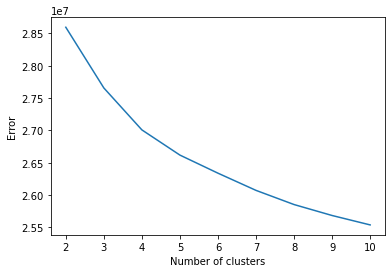

In [749]:
plt.plot(range(2,len(error)),error[2:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

Text(0, 0.5, 'silhouette score')

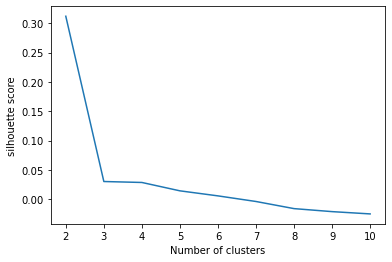

In [753]:
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

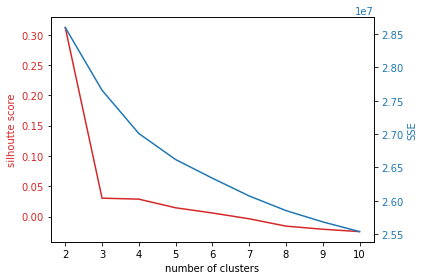

In [750]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

Ως καλύτερος αριθμός cluster φαίνεται να είναι ο 4, καθώς έχει το υψηλότερο silhouette score στα k όπου το SSE αρχίζει να πέφτει (πέρα από το k=2 που έχει μεγάλο SSE). Έτσι θα μπορούσαμε να πούμε ότι οι χρήστες χωρίζονται επαρκώς σε 4 ομάδες βάση βαθμολογιών στα αστεία.

In [758]:
# run for best cluster number
kmeans = KMeans(n_clusters=4)
kmeans.fit_predict(R.toarray())

centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  27008936.45798815

Cluster labels
[0 2 3 ... 3 3 1]

 Cluster Centroids
[[-1.61998705e-02 -1.28094560e+00  6.48827720e-02 -5.81742228e-02
  -7.71117098e-01 -9.82476943e-01  1.15826801e+00  6.26526554e-01
   1.35920052e+00  2.89805699e-03  1.34475130e+00  3.08035622e-01
   2.25691580e-01 -2.11129922e-01  4.11289119e-01  8.98801554e-01
   3.51363990e-02  1.00973977e+00  1.84423005e+00  1.43939249e-01
   2.03248705e-02  3.20140557e+00 -4.53914508e-02  4.00044430e-01
   3.34112642e+00  1.88872163e+00  1.15110104e-02  6.44222409e-01
   6.51829016e-01  4.20026554e-01 -6.90746114e-02  6.54553627e-01
   2.73225389e-03 -2.29850000e-01  5.02756606e-01  5.41258290e-01
   2.08461386e+00  1.37547759e+00  2.07908355e+00  2.15588756e+00
   8.70077720e-04  4.30310881e-03  3.35801464e+00  2.16380855e+00
   3.93961140e-02  1.42660427e+00 -1.21768912e-01 -3.05176295e-01
   2.66102591e-01  1.34561399e-01  2.08344560e-02  2.41590907e+00
   1.74201295e+00 -5.66012953e-

In [759]:
testdata_new = testdata[['index','id','user_id','joke_id','Rating']].copy()
testdata_new.head()

,index,id,user_id,joke_id,Rating
0,948837,39893_22,39892,21,-0.281
1,502194,25778_7,25777,6,-7.031
2,727692,24147_76,24146,75,5.750
3,155191,4374_9,4373,8,-4.125
4,897456,18377_120,18376,119,-2.500


In [785]:
centroids[:,testdata_new.joke_id[0]]

array([3.20140557, 4.45180759, 0.91374934, 0.16677576])

In [786]:
np.argmin(centroids[:,testdata_new.joke_id[0]])

3

In [772]:
kmeans_labels[testdata_new.user_id[0]]

2

In [773]:
centroids[kmeans_labels[testdata_new.user_id[0]],testdata_new.joke_id[0]]

0.9137493352796977

In [787]:
def p_calc(user, joke):
    p = centroids[kmeans_labels[user],joke]
    return p

In [789]:
testdata_new['predicted'] = testdata_new[['user_id','joke_id']].apply(lambda x: p_calc(x.user_id, x.joke_id), axis=1)

In [790]:
testdata_new

,index,id,user_id,joke_id,Rating,predicted
0,948837,39893_22,39892,21,-0.281,0.913749
1,502194,25778_7,25777,6,-7.031,-1.747892
2,727692,24147_76,24146,75,5.750,0.335208
3,155191,4374_9,4373,8,-4.125,2.392408
4,897456,18377_120,18376,119,-2.500,0.084698
...,...,...,...,...,...,...
9995,588150,24968_123,24967,122,4.312,2.917504
9996,376437,27371_3,27370,2,-4.188,0.064883
9997,393810,23050_50,23049,49,-0.969,0.134561
9998,97076,247_9,246,8,6.312,1.359201


In [791]:
kmeans_rmse = mean_squared_error(y_true=testdata_new.Rating,y_pred=testdata_new.predicted,squared=False)
print('Best RMSE for k=4: ',best_rmse)

Best RMSE for k=4:  4.634031834770969


To RMSE του kmeans είναι κοντά στα RMSE των προηγούμενων αλγορίθμων της ερώτησης 3.